In [1]:
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


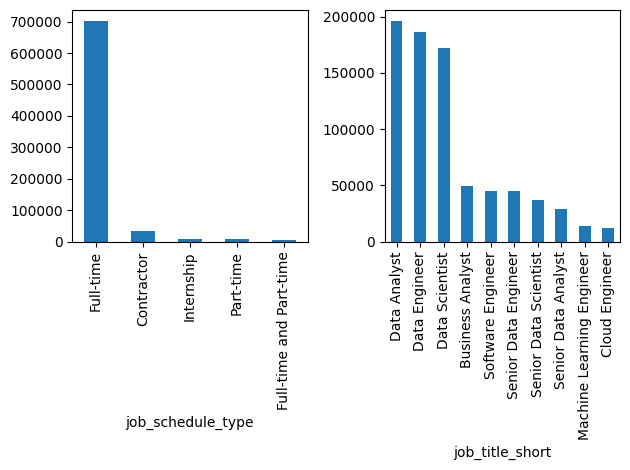

In [2]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1]) 
df['job_schedule_type'].value_counts().head().plot(kind='bar', ax=ax[0])
# To change the place of these we only change the index for example 
# df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1]) 
# df['job_schedule_type'].value_counts().head().plot(kind='bar', ax=ax[0])
fig.tight_layout()

In [3]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
df_explode = df_skills.groupby(['job_title_short', 'job_skills']).size()
reset_df = df_explode.reset_index(name='skill_counts')
reset_df.sort_values(by='skill_counts', ascending=False, inplace=True)
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
reset_df

,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


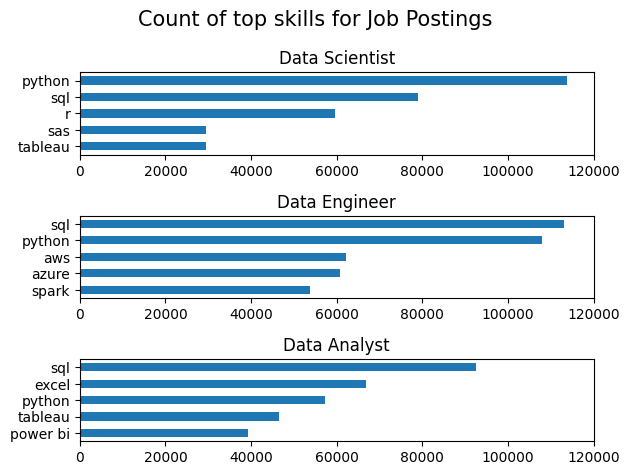

In [4]:
fig, ax = plt.subplots(3, 1)
for i, job_title in enumerate(job_titles):
    df_plot = reset_df[reset_df['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_counts', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000) # To compare them all with same number 
fig.suptitle('Count of top skills for Job Postings', fontsize=15)
fig.tight_layout()